# Classificazione origine degli oli dataset Idrocarburi semplificato

In [1]:
# librerie di base
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import scikitplot as skplt
import numpy as np
from sklearn.utils import class_weight
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import MinMaxScaler
# librerie algoritmi
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [2]:
np.random.seed(42)

### Caricamento del Dataset semplificato

In [3]:
df = pd.read_csv('../dataset/df_media_TIC_Idro_min_1-40_semplificato.csv')
#df

In [4]:
X = df.iloc[:, 2:]
y_origine = df.iloc[:,0]
# creazione di una versione scalata dei dati sugli idrocarburi
scaler = MinMaxScaler()
X_scalati = scaler.fit_transform(X)

### Calcolo dei pesi delle classi creando un dizionario

In [5]:
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_origine), y=y_origine)
class_weight_dizionario = dict(zip(np.unique(y_origine), class_weights))
class_weight_dizionario

{'grecia - peloponneso': 2.0217391304347827,
 'grecia-creta': 1.0813953488372092,
 'italia': 1.6607142857142858,
 'spagna': 0.5054347826086957}

## KNN con validazione incrociata

### KNN

In [6]:
# istanzio il modello e faccio cross-validation
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y_origine,  cv=10)
print(f'Media: {scores.mean()}')
#scores

Media: 0.9093567251461989


                      precision    recall  f1-score   support

grecia - peloponneso       0.73      0.83      0.78        23
        grecia-creta       0.93      0.98      0.95        43
              italia       0.90      0.93      0.91        28
              spagna       0.95      0.89      0.92        92

            accuracy                           0.91       186
           macro avg       0.88      0.91      0.89       186
        weighted avg       0.91      0.91      0.91       186



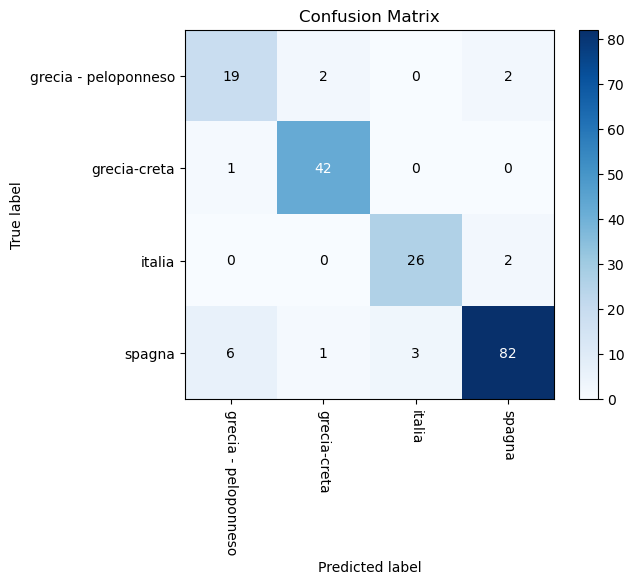

In [7]:
predizioni = cross_val_predict(knn, X, y_origine,  cv=10)
print(classification_report(y_origine, predizioni))
skplt.metrics.plot_confusion_matrix(y_origine, predizioni)
plt.xticks(rotation=-90)
plt.show()

### KNN con dati scalati

In [8]:
knn_scale = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X_scalati, y_origine,  cv=10)
print(f'Media: {scores.mean()}')
#scores

Media: 0.8929824561403509


## SVM con validazione incrociata

### SVM

In [9]:
svc = SVC(kernel='poly', C=1)
#il kernel poly è quello che da i risultati migliori rispetto a linear, rbf e sigmoid
scores = cross_val_score(svc, X, y_origine,  cv=10)
print(f'Media: {scores.mean()}')
#scores

Media: 0.9093567251461987


### SVM con bilanciamento del modello

In [10]:
svc_w = SVC(kernel='poly', C=1, class_weight=class_weight_dizionario)
#il kernel poly è quello che da i risultati migliori rispetto a linear, rbf e sigmoid
scores = cross_val_score(svc_w, X, y_origine,  cv=10)
print(f'Media: {scores.mean()}')
#scores

Media: 0.904093567251462


### SVM con bilanciamento del modello e dati scalati

In [11]:
svc_w_scale = SVC(kernel='poly', C=1, class_weight=class_weight_dizionario)
#il kernel poly è quello che da i risultati migliori rispetto a linear, rbf e sigmoid
scores = cross_val_score(svc_w, X_scalati, y_origine,  cv=10)
print(f'Media: {scores.mean()}')
#scores

Media: 0.8754385964912281


## Random Forest con validazione incrociata

### Random Forest

In [12]:
rand_for = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rand_for, X, y_origine,  cv=10)
print(f'Media: {scores.mean()}')
#scores

Media: 0.9078947368421053


### Random Forest con bilanciamento del modello

In [13]:
rand_for_w = RandomForestClassifier(n_estimators=100, class_weight=class_weight_dizionario)
scores = cross_val_score(rand_for_w, X, y_origine,  cv=10)
print(f'Media: {scores.mean()}')
#scores

Media: 0.92953216374269


### Random Forest con bilanciamento del modello e con dati scalati

In [14]:
rand_for_w_scale = RandomForestClassifier(n_estimators=100, class_weight=class_weight_dizionario)
scores = cross_val_score(rand_for_w_scale, X_scalati, y_origine,  cv=10)
print(f'Media: {scores.mean()}')
#scores

Media: 0.9298245614035088


### Random Forest con dati scalati

In [15]:
rand_for_scale = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rand_for, X_scalati, y_origine,  cv=10)
print(f'Media: {scores.mean()}')
#scores

Media: 0.9195906432748538


# Risultati non migliori di quelli ottenuti con i VOCs, anche in questo caso i risultati migliori si hanno con SVC e con Random Forest

### Decision Tree

In [16]:
# con bilanciamento del modello e con dati scalati
dec_tree = DecisionTreeClassifier(class_weight=class_weight_dizionario)
scores = cross_val_score(dec_tree, X_scalati, y_origine,  cv=10)
print(f'Media: {scores.mean()}')
#scores

Media: 0.8099415204678362


### Naive Bayes

In [17]:
nai_bay = GaussianNB()
scores = cross_val_score(nai_bay, X, y_origine,  cv=10)
print(f'Media: {scores.mean()}')
#scores

Media: 0.881578947368421


# Rispetto alla classificazione utilizzando i VOCs, Decision Tree e Naive Bayes sembrano girare meglio con gli Idrocarburi. Tuttavia i risultati non sono migliori di quelli ottenuti in precedenza